In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math
from ipywidgets import *
from IPython.display import display
import urllib.request
import gzip

In [2]:
url="http://lss.phy.vanderbilt.edu/lasdamas/mocks/gamma/main21/sdssmock_gamma_main21_carmen09a_no.rdcz.dat.gz"
infile = urllib.request.urlopen(url)

ra=[]
dec=[]
cz=[]

for line in gzip.open(infile,'r'):
    fields = line.split()
    ra.append(float(fields[0]))
    dec.append(float(fields[1]))
    cz.append(float(fields[2]))
infile.close()

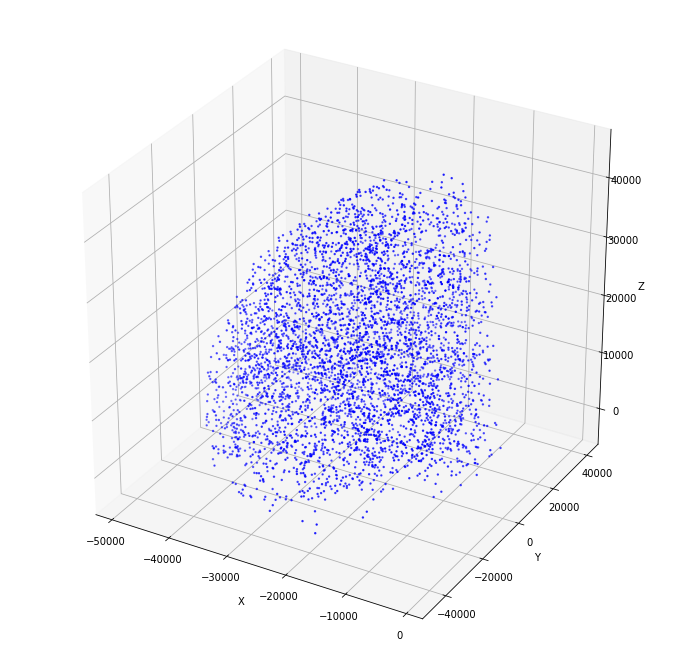

interactive(children=(FloatSlider(value=30.0, description='a', max=60.0, step=1.0), FloatSlider(value=45.0, de…

In [4]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
slice=20
r = np.array(ra[0::slice])
d = np.array(dec[0::slice])
c = np.array(cz[0::slice])

z = c * np.sin(d / 180 * np.pi)
x = c * np.cos(d / 180 * np.pi) * np.cos(r / 180 * np.pi)
y = c * np.cos(d / 180 * np.pi) * np.sin(r / 180 * np.pi)
ax.scatter(x, y, z, s=2, c='b', marker='o')

def new_view (a, b):
    ax.view_init(a, b)
    display(fig)

interact(new_view, a=(0,60,1.0),b=(0.0,90,1.0));